# Load librarys

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

# Load the images and create neural network model with TensorFlow 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import matplotlib.pyplot as plt

### Get Data and associate Labes


In [6]:
# Dataset
import zipfile

# Extract the dataset
z = zipfile.ZipFile('archive.zip')

# Extract all the contents of zip file in current directory to a new folder named 'data'
z.extractall('data')


In [39]:
# Overview of the data
flie_path_Brain_Tumor = 'data/Brain Tumor.csv'
df1 = pd.read_csv(flie_path_Brain_Tumor)
df1.head()
type(df1['Coarseness'][0])

numpy.float64

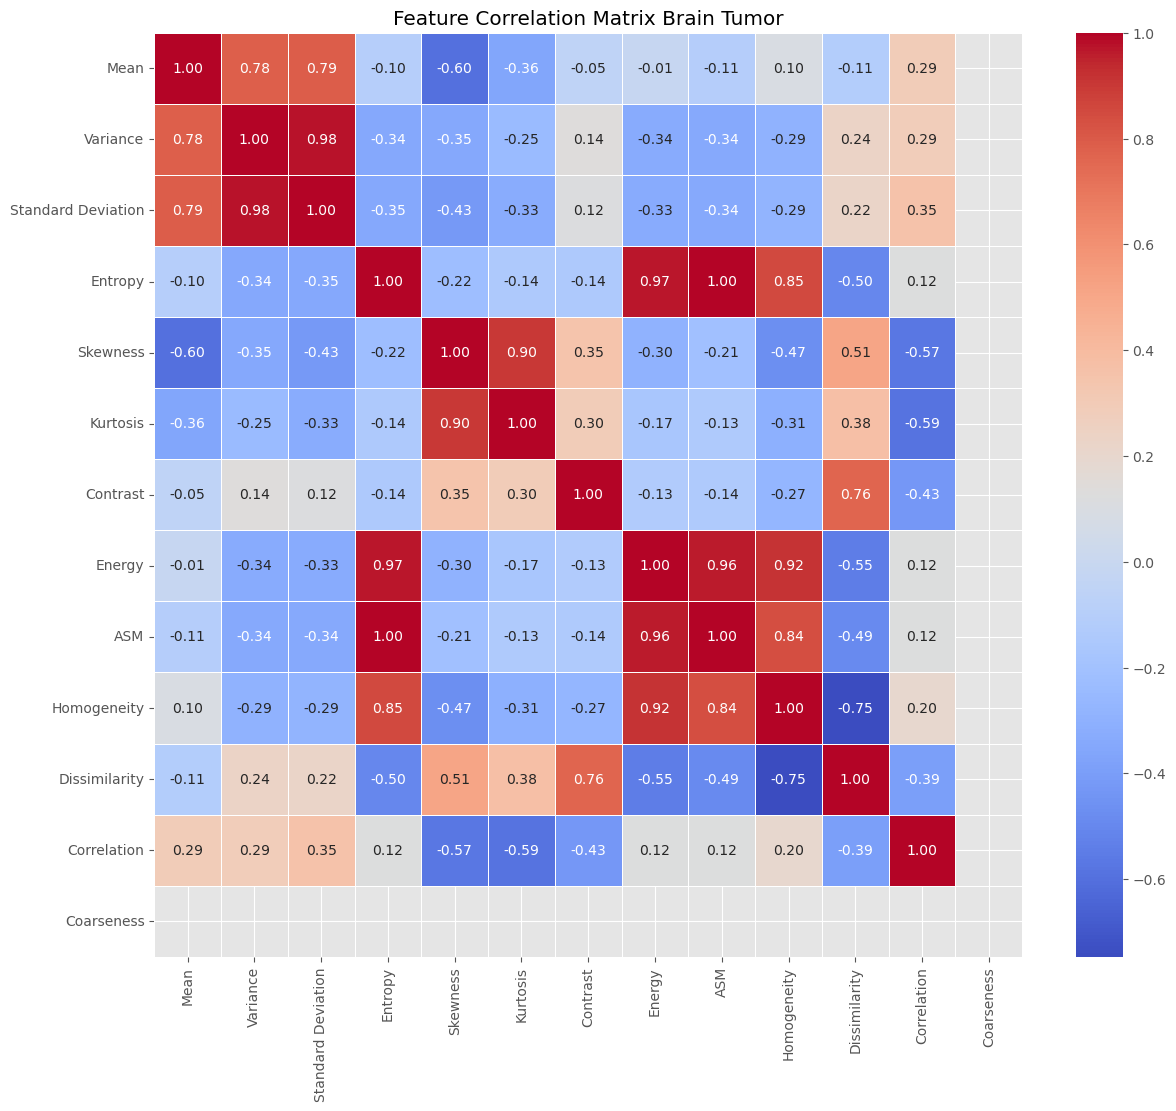

In [34]:
# Check feature correlations with heatmap

# Drop all non-numeric and target columns for heatmap
features1 = df1.drop(['Image', 'Class'], axis=1)

# Compute the correlation matrix
plt.figure(figsize=(14,12))
correlation_matrix1 = features1.corr()
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix Brain Tumor')
plt.show()

In [28]:
# Overview of the data
flie_path_bt_dataset_t3 = 'data/bt_dataset_t3.csv'
df2 = pd.read_csv(flie_path_bt_dataset_t3)
df2.head()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989,1
1,Image2,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019,1
2,Image3,3.244263,642.059166,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.458341e-155,112.266298,0.985362,0.006372,0.849775,1
3,Image4,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.458341e-155,101.955792,0.881015,0.068437,0.000000,0
4,Image5,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.458341e-155,97.639870,0.766308,0.184878,0.000000,0


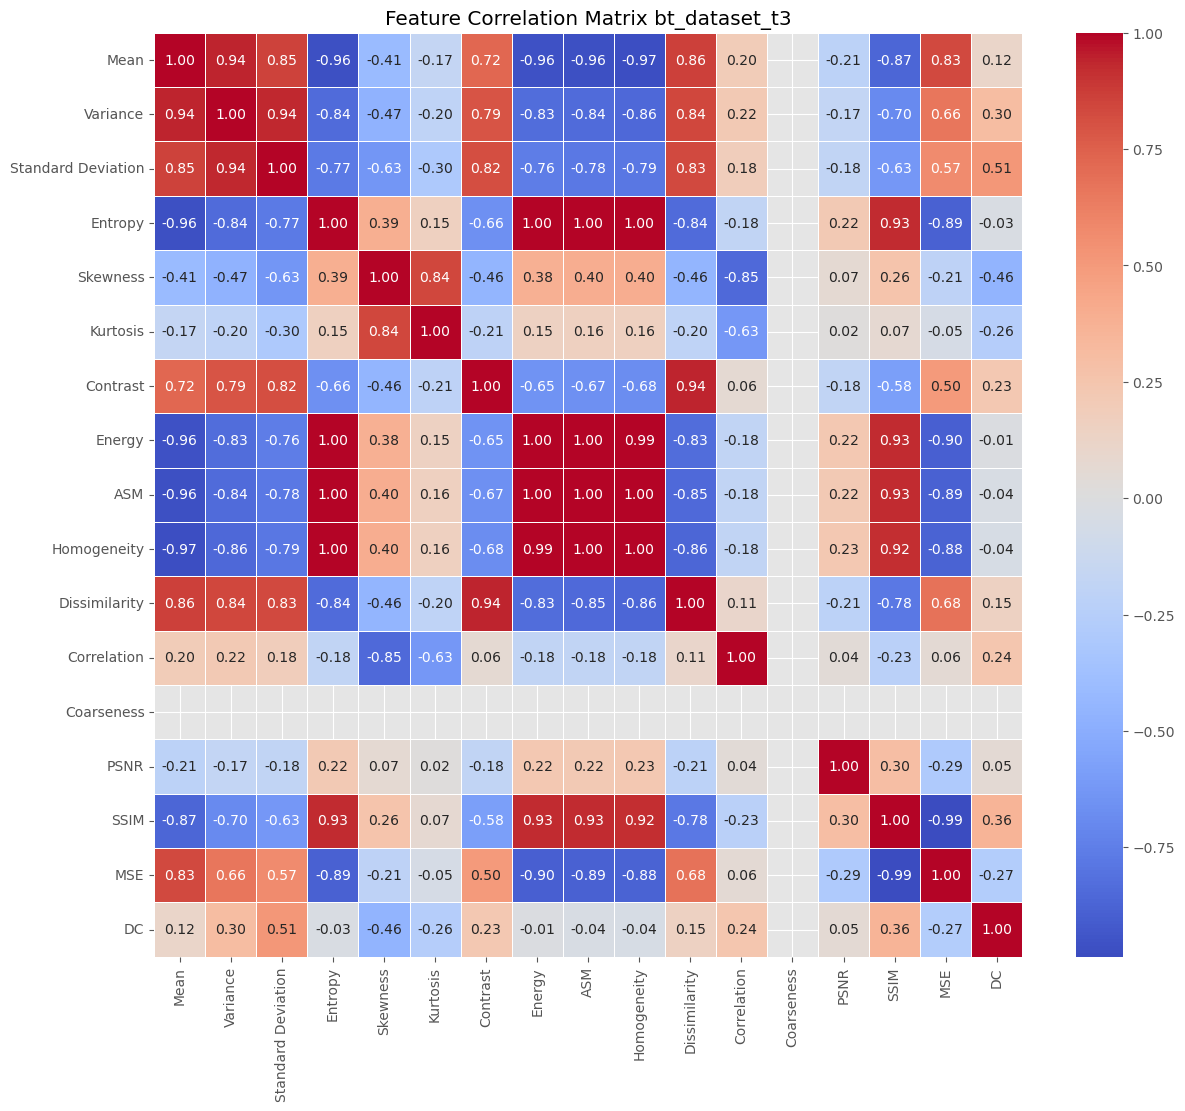

In [35]:
# Check feature correlations with heatmap

# Drop all non-numeric and target columns for heatmap
features2 = df2.drop(['Image', 'Target'], axis=1)

# Compute the correlation matrix
plt.figure(figsize=(14,12))
correlation_matrix2 = features2.corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix bt_dataset_t3')
plt.show()

In [40]:
# Normalize the Mean, Variance and Standard Deviation columns
df1['Mean'] = df1['Mean'] / max(df1['Mean'])
df1['Variance'] = df1['Variance'] / max(df1['Variance'])
df1['Standard Deviation'] = df1['Standard Deviation'] / max(df1['Standard Deviation'])

In [41]:
df1.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,0.196611,0.212874,0.461383,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,0.263236,0.276906,0.526219,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,0.220851,0.392983,0.626883,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,0.179246,0.329732,0.574223,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,0.220073,0.250651,0.500651,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


Number of images in tumor folder: 1683
Number of images in non_tumor folder: 2079


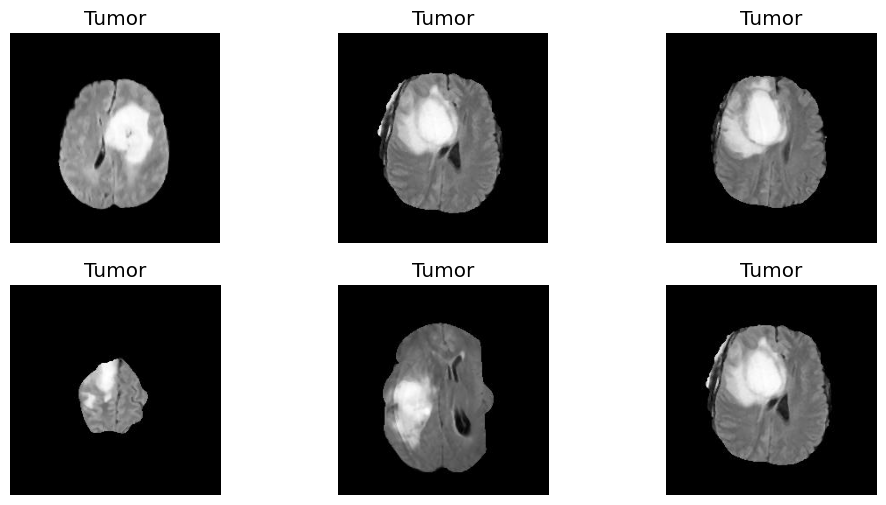

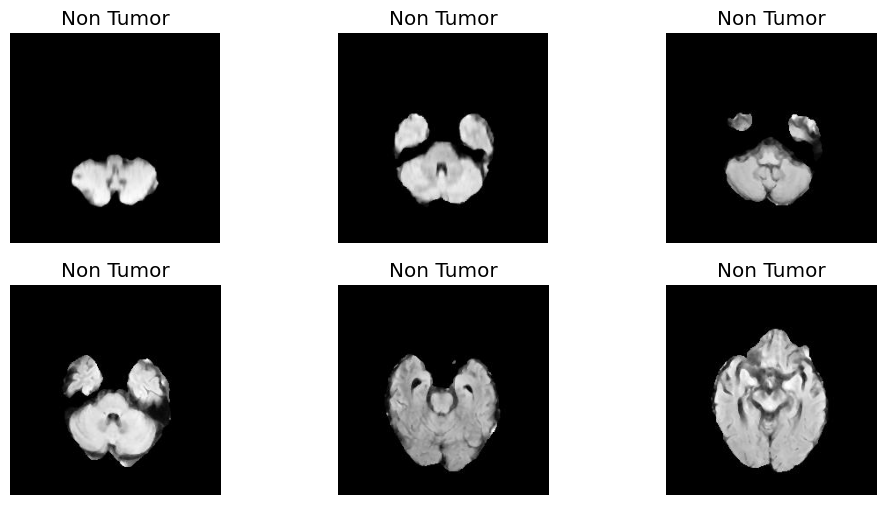

In [42]:
label_csv = pd.read_csv('data/Brain Tumor.csv')
label_csv.head()

image_folder = 'data/Brain Tumor/Brain Tumor'

# Save all the images to a folder named tumor and non_tumor
tumor_folder = 'data/labeled/tumor'
non_tumor_folder = 'data/labeled/non_tumor'

# Create the folders
os.makedirs(tumor_folder, exist_ok=True)
os.makedirs(non_tumor_folder, exist_ok=True)

# Copy the images to the folders
for index, row in label_csv.iterrows():
    image_path = os.path.join(image_folder, row['Image']+ '.jpg')
    if row['Class'] == 1:
        shutil.copy(image_path, tumor_folder)
    else:
        shutil.copy(image_path, non_tumor_folder)

# Check the number of images in each folder
print('Number of images in tumor folder:', len(os.listdir(tumor_folder)))
print('Number of images in non_tumor folder:', len(os.listdir(non_tumor_folder)))

# Display a few images from each folder
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(mpimg.imread(os.path.join(tumor_folder, os.listdir(tumor_folder)[i])))
    plt.title('Tumor')
    plt.axis('off')
plt.show()

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(mpimg.imread(os.path.join(non_tumor_folder, os.listdir(non_tumor_folder)[i])))
    plt.title('Non Tumor')
    plt.axis('off')
plt.show()


#### Load Data with tensorflow as pipline

Found 3762 files belonging to 2 classes.


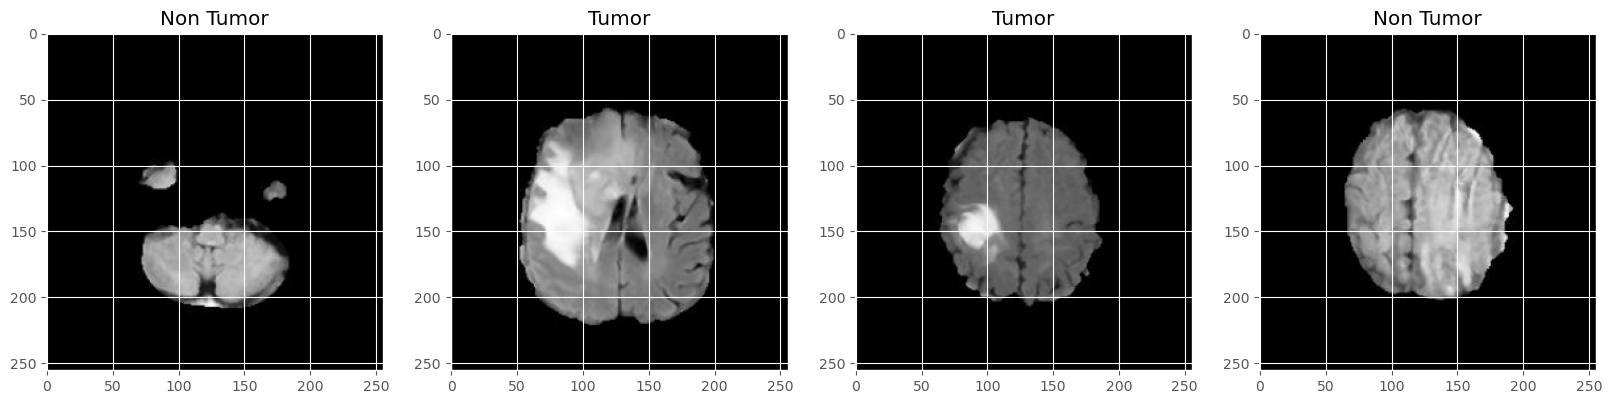

In [71]:
# building data pipeline
data = tf.keras.utils.image_dataset_from_directory('data/labeled')


# create a data iterator
data_iterator = data.as_numpy_iterator()

# creat a batch 
batch = data_iterator.next()

# images represented as numpy arrays
batch[0].shape

# plot the batch to see which class belongs to which image
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    # set the title of the image with tumor or non_tumor
    ax[idx].title.set_text('Tumor' if batch[1][idx] == 1 else 'Non Tumor')


# Preprocessing

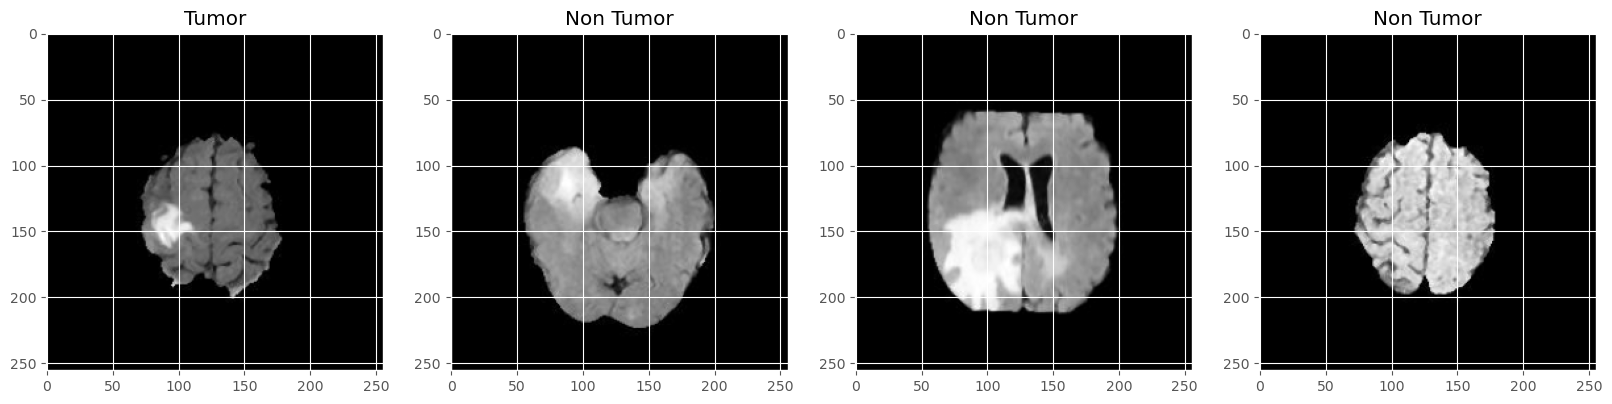

In [78]:
# scale the data pipline on the fly 
data_norm = data.map(lambda x, y: (x/255, y))

# preprocess the data to gray scale
data_gray = data.map(lambda x, y: (tf.image.rgb_to_grayscale(x), y))

# create a scaled data iterator
scaled_interator = data_gray.as_numpy_iterator()
scaled_batch = scaled_interator.next()
scaled_batch[0].min()

# display the batch
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img, cmap='gray')
    ax[idx].title.set_text('Tumor' if batch[1][idx] == 1 else 'Non Tumor')

Split Data

In [79]:
# decide the size of the train, validation and test datasets
print(len(data_gray))
train_size = int(len(data_gray)*.7)
val_size = int(len(data_gray)*.2)+1
test_size = int(len(data_gray)*.1)+1

train_size + val_size + test_size

118


118

In [80]:
# split the data into train, validation and test
train = data_gray.take(train_size)
val = data_gray.skip(train_size).take(val_size)
test = data_gray.skip(train_size+val_size).take(test_size)

print(len(train), len(val), len(test))


82 24 12


# Data Augementation

In [130]:
# Define data augmentation only for training
train_data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(height_factor=(-0.1, 0.1), width_factor=None),
    tf.keras.layers.RandomBrightness(0.1, value_range=(0, 255))
])

# Apply augmentation to the training dataset
train_augmented = train.map(lambda x, y: (train_data_augmentation(x, training=True), y))

# Define the percentage of augmented data
augmented_data_percentage = 0.4

# Calculate the number of augmented images
augmented_data_size = int(len(train) * augmented_data_percentage*32)

print('Number of augmented images:', augmented_data_size)

# combine the augmented data with the original data
train_combined = train.concatenate(train_augmented.take(augmented_data_size)).shuffle(1000)

print('Number of images in the combined dataset:', len(train_combined) * 32)


Number of augmented images: 1049
Number of images in the combined dataset: 5248


(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)


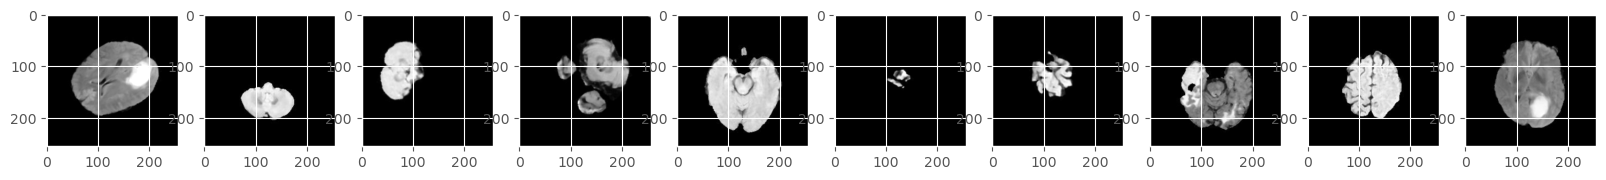

In [132]:
# display the batch
fig, ax = plt.subplots(ncols=10, figsize=(20, 20))
for idx, img in enumerate(train_combined.take(10)):
    ax[idx].imshow(img[0][0], cmap='gray')

    # print the shape of the image
    print(img[0][0].shape)

# Modeling 

In [133]:
scaled_batch[0].shape

(32, 256, 256, 1)

## Model 1: New Model

Epoch 1/10


c:\Users\fr3m3\anaconda3\envs\NeuNe_tensor\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


164/164 ━━━━━━━━━━━━━━━━━━━━ 75s 383ms/step - binary_accuracy: 0.6924 - loss: 21.0365 - precision_12: 0.6786 - recall_12: 0.5775 - val_binary_accuracy: 0.7995 - val_loss: 0.4396 - val_precision_12: 0.7801 - val_recall_12: 0.7710
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 72s 373ms/step - binary_accuracy: 0.7912 - loss: 0.4669 - precision_12: 0.7885 - recall_12: 0.7295 - val_binary_accuracy: 0.8307 - val_loss: 0.3899 - val_precision_12: 0.8746 - val_recall_12: 0.7493
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 72s 372ms/step - binary_accuracy: 0.8218 - loss: 0.3913 - precision_12: 0.8180 - recall_12: 0.7728 - val_binary_accuracy: 0.8841 - val_loss: 0.2893 - val_precision_12: 0.8639 - val_recall_12: 0.8860
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 73s 380ms/step - binary_accuracy: 0.8625 - loss: 0.3258 - precision_12: 0.8548 - recall_12: 0.8334 - val_binary_accuracy: 0.8802 - val_loss: 0.2740 - val_precision_12: 0.9311 - val_recall_12: 0.8000
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 73s 382ms/step

KeyError: 'accuracy'

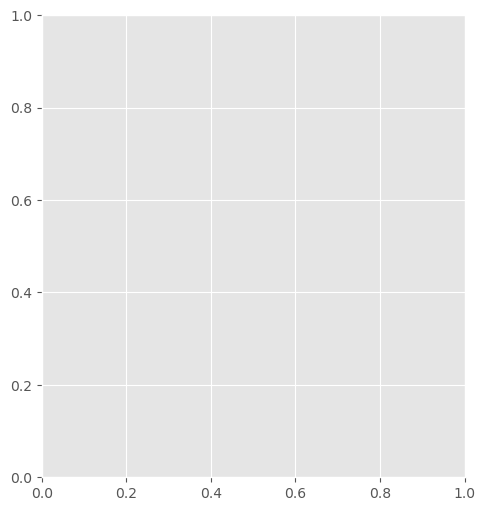

In [134]:
# Create a neural network model which loads the images and classifies them as tumor or non-tumor and the csv file with values like standard deviation, mean, etc.
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Precision(), Recall(), BinaryAccuracy(), 'accuracy'])

# Train the model
history = model.fit(train_combined, validation_data=val, epochs=10, callbacks=[EarlyStopping(patience=3)])


# Plot the accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model 2: Old Model

Epoch 1/10


c:\Users\fr3m3\anaconda3\envs\NeuNe_tensor\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


82/82 ━━━━━━━━━━━━━━━━━━━━ 48s 572ms/step - accuracy: 0.6671 - loss: 0.6300 - val_accuracy: 0.7943 - val_loss: 0.4324
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 47s 569ms/step - accuracy: 0.7601 - loss: 0.4963 - val_accuracy: 0.8503 - val_loss: 0.3776
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 47s 568ms/step - accuracy: 0.8145 - loss: 0.4057 - val_accuracy: 0.8724 - val_loss: 0.3353
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 47s 570ms/step - accuracy: 0.8292 - loss: 0.3827 - val_accuracy: 0.8464 - val_loss: 0.3651
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 48s 576ms/step - accuracy: 0.8162 - loss: 0.4034 - val_accuracy: 0.8477 - val_loss: 0.3766


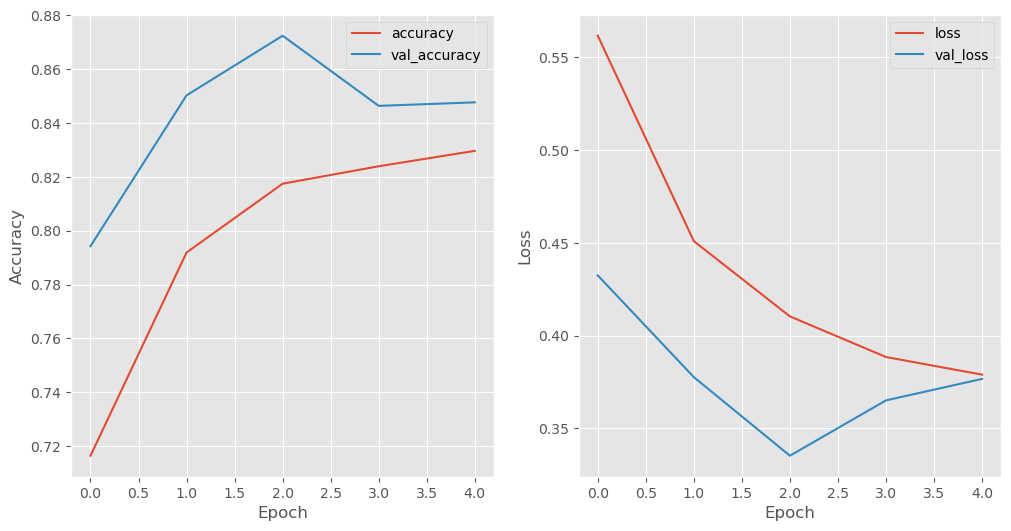

In [10]:
# Create the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(train, validation_data=val, epochs=10, callbacks=[early_stopping])

# Plot the accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
AUC: 0.8961038961038961
F1: 0.8


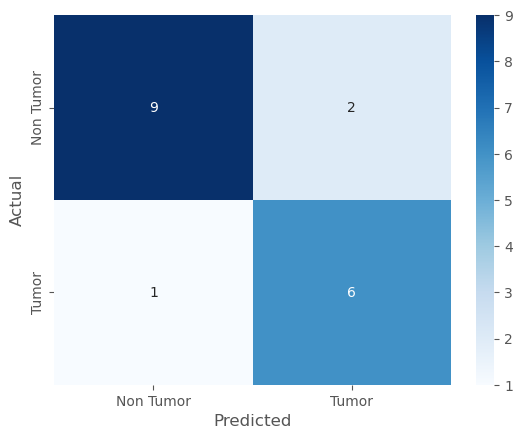

In [140]:
# Plot the AUC and F1 score
from sklearn.metrics import roc_auc_score, f1_score

# Get the predictions
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

# Calculate the AUC
auc = roc_auc_score(y, yhat)
print('AUC:', auc)

# Calculate the F1 score
f1 = f1_score(y, yhat > 0.5)
print('F1:', f1)

# Display the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, yhat > 0.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# rename the labels to tumor and non_tumor
plt.xticks([0.5, 1.5], ['Non Tumor', 'Tumor'])
plt.yticks([0.5, 1.5], ['Non Tumor', 'Tumor'])
plt.show()



# Evaluate Performance

In [141]:
# Messures used for classification problems, precision, recall and accuracy. 
# Establish instance of precision, recall and accuracy
pre =  Precision()
re = Recall()
acc = BinaryAccuracy()

In [142]:
len(test)

12

In [143]:
# Iterate over the test dataset
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    # Reshape yhat if necessary to match the dimensions of y
    if yhat.shape[-1] == 1:
        yhat = tf.squeeze(yhat, axis=-1)  # Squeeze the last dimension

    # Update metric states
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)  # Here, we correctly use BinaryAccuracy

# Print the results after processing all batches
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Precision: 0.8166666626930237, Recall: 0.918749988079071, Accuracy: 0.8761574625968933


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


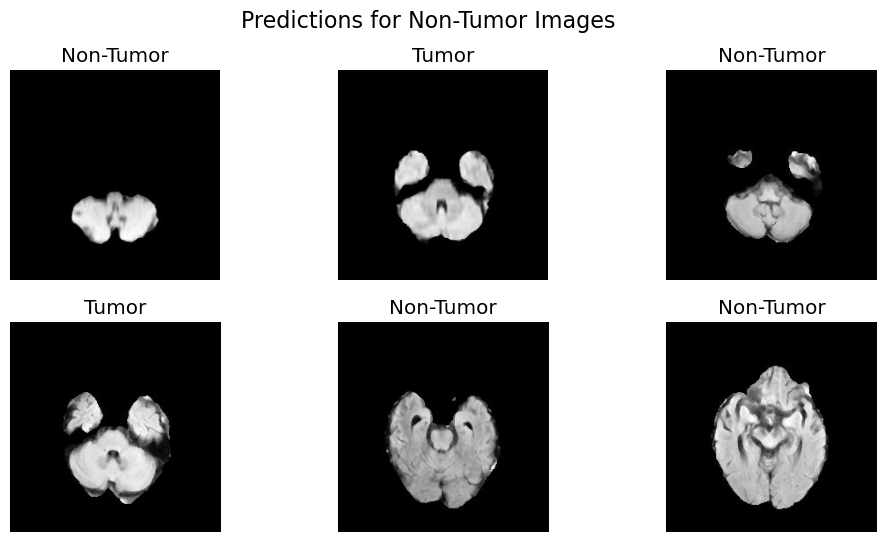

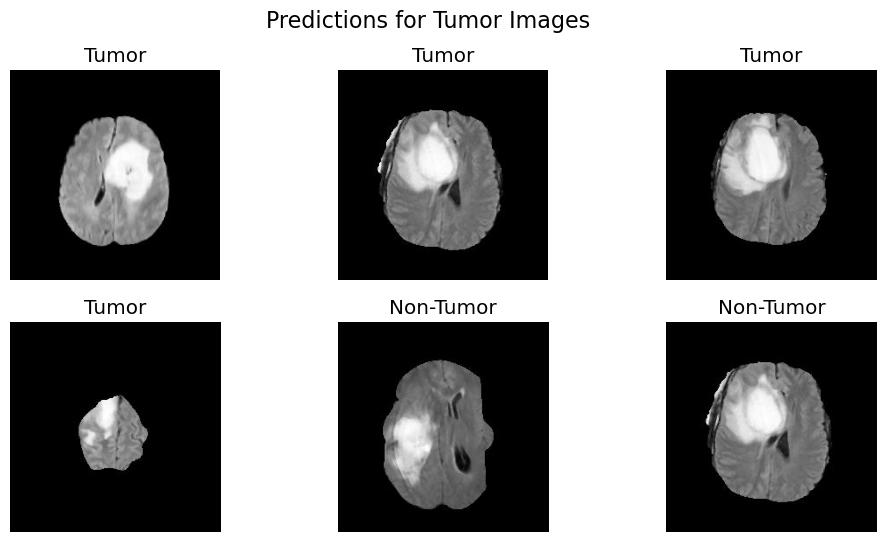

In [146]:
# Predictions on test dataset
predictions = model.predict(test)  # Use the 'test' dataset directly

tumor_folder = 'data/labeled/tumor'
non_tumor_folder = 'data/labeled/non_tumor'

# Display predictions for images from non_tumor_folder
plt.figure(figsize=(12, 6))
for i in range(6):
    # Load images directly from the folder
    img_path = os.path.join(non_tumor_folder, os.listdir(non_tumor_folder)[i])
    img = mpimg.imread(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title('Tumor' if predictions[i+6] > 0.5 else 'Non-Tumor')
    plt.axis('off')
    plt.suptitle('Predictions for Non-Tumor Images', fontsize=16)
plt.show()

# Display predictions for images from tumor_folder
plt.figure(figsize=(12, 6))
for i in range(6):
    # Load images directly from the folder
    img_path = os.path.join(tumor_folder, os.listdir(tumor_folder)[i])
    img = mpimg.imread(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title('Tumor' if predictions[i] > 0.5 else 'Non-Tumor')
    plt.axis('off')
    plt.suptitle('Predictions for Tumor Images', fontsize=16)
plt.show()

# Save the Model

In [20]:
# Create the model folder
os.makedirs('model', exist_ok=True)

# Save the model
model.save(os.path.join('model', 'brain_tumor_classifier.keras'))

# save the model in the h5 format
model.save('model/brain_tumor_classifier.h5')